In [18]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

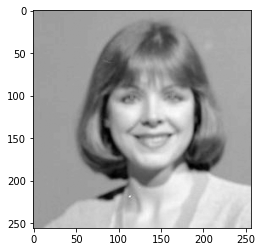

In [43]:
image = cv.imread("/home/student/Downloads/IMG-20250306-WA0011.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(image ,cmap="gray")


In [44]:
def laplacian(img,filter):
    filtered = np.zeros_like(img)
    for i in range (1,img.shape[0]-2):
        for j in range (1,img.shape[1]-2):
            if(i-1>0 and j-1>0 and i+2 <img.shape[0] and j+2<img.shape[1]):
             filtered[i,j] = np.sum(img[i-1:i+2,j-1:j+2]*filter)
    maxi = np.max(filtered)
    mini = np.min(filtered)
    filtered = filtered - mini
    filtered = 255*filtered/maxi
            
    return filtered

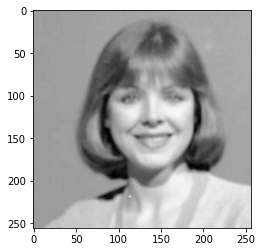

In [45]:
lap1 = laplacian(image,np.array([[0,1,0],[1,-4,1],[0,1,0]]))
plt.imshow(lap1+image,cmap='gray')

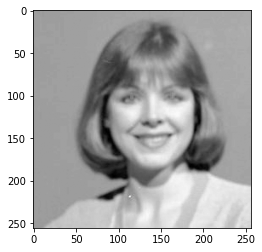

In [51]:
lap2 = laplacian(image,np.array([[0,-1,0],[1,4,1],[0,-1,0]]))
plt.imshow(lap2+image,cmap='gray')

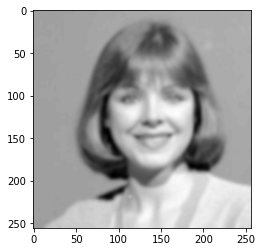

In [47]:
blurred_img = cv.GaussianBlur(image, (7,7),0)
plt.imshow(blurred_img,cmap='gray')

In [48]:
def unsharp(img,k):
    sub_img = img - blurred_img
    return(img + k*sub_img)

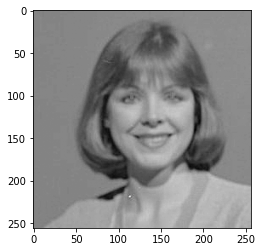

In [49]:
unsharp_img = unsharp(image,1)
plt.imshow(unsharp_img,cmap='gray')

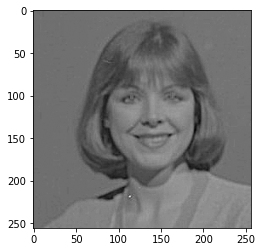

In [73]:
 high_boost = unsharp(image,3)
plt.imshow(high_boost,cmap='gray')

In [55]:
def cross_correlation(img,kernel):
    filtered = np.zeros_like(img)
    k = kernel.shape[0]
    for i in range (img.shape[0]-k):
        for j in range (img.shape[1]-k):
            if(i+k<img.shape[0] and j+k<img.shape[1]):
             filtered[i,j] = np.sum(img[i:i+k,j:j+k]*kernel)
    filtered  = filtered/(k **2)

    return filtered

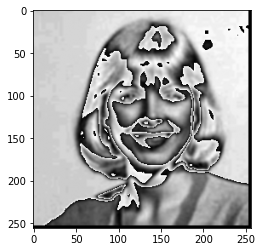

In [58]:
cross1 = cross_correlation(image,np.array([[1,1,1],[1,1,1],[1,1,1]]))
plt.imshow(cross1,cmap='gray')

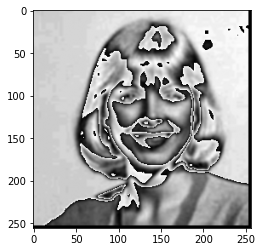

In [59]:
cross2 = cross_correlation(image,np.array([[2,4,2],[1,1,1],[2,4,2]]))
plt.imshow(cross1,cmap='gray')

In [65]:
def convolution(img,kernel):
    filtered = np.zeros_like(img)
    k = kernel.shape[0]-2
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for x in range(-k,k):
                for y in range(-k,k):
                    if(i-x>=0 and j-y>=0 and i-x<img.shape[0] and j-y<img.shape[1]):
                        filtered[i,j] +=img[i-x,j-y]*kernel[x+k][y+k]
    filtered = filtered/(k**2)

    return filtered

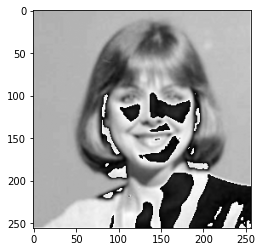

In [66]:
cross1 = convolution(image,np.array([[1,1,1],[1,1,1],[1,1,1]]))
plt.imshow(cross1,cmap='gray')

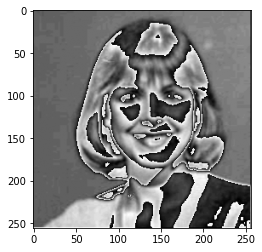

In [79]:
cross1 = convolution(image,np.array([[2,4,2],[1,1,1],[2,4,2]]))
plt.imshow(cross1,cmap='gray')

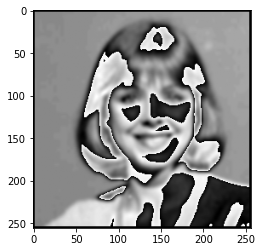

In [78]:
horizontal = laplacian(blurred_img,np.array([[-1,-1,-1],[0,0,0],[-1,-1,-1]]))
plt.imshow(horizontal,cmap='gray')

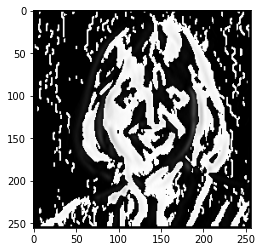

In [77]:
vertical = laplacian(blurred_img,np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
plt.imshow(vertical,cmap='gray')

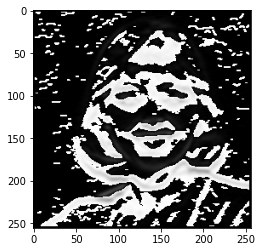

In [76]:
sobal_x = laplacian(blurred_img,np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
plt.imshow(sobal_x,cmap='gray')

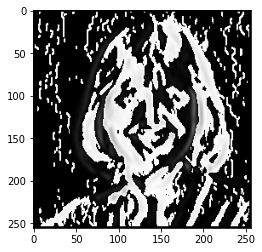

In [75]:
sobal_y = laplacian(blurred_img,np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
plt.imshow(sobal_y,cmap='gray')